# Find all distinct colors

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def get_colors(image_path):
    image = Image.open(image_path).convert("RGB")  # Open and convert image to RGB
    colors = image.getcolors(maxcolors=1000000)  # Extract colors from image
    
    unique_colors = set()
    color_info = []
    
    for count, color in colors:
        hex_code = '#%02x%02x%02x' % color  # Convert RGB to hex
        unique_colors.add(hex_code)
        color_info.append(hex_code)
    
    return color_info

def plot_colors(color_info):
    num_colors = len(color_info)
    fig, ax = plt.subplots(1, figsize=(num_colors, 2))
    ax.set_xlim(0, num_colors)
    ax.set_ylim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])
    
    for i, hex_code in enumerate(color_info):
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=hex_code))
        ax.text(i + 0.5, -0.1, hex_code, ha='center', va='center', fontsize=8, rotation=45)
    
    plt.show()


['#e0f8cf', '#86c06c', '#071821', '#306850']


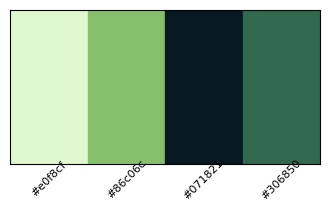

In [5]:
image_path = "/Users/sophial/Downloads/RPG_fantasy_tilesets/RPG_exterior.png"
# image_path = "/Users/sophial/Documents/Images/palette.png"
colors = get_colors(image_path)
print(colors)
plot_colors(colors)

# Replace specific colors

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

def hex_to_rgb(hex_color):
    """Converts hexadecimal color representation to RGB."""
    hex_color = hex_color.strip("#")
    return tuple(int(hex_color[i:i + 2], 16) for i in (0, 2, 4))


def apply_color_mapping(image_path, color_map):
    image = Image.open(image_path)
    width, height = image.size

    pixels = image.load()

    # Iterate through each pixel
    for y in range(height):
      for x in range(width):
        # r, g, b, t = pixels[x, y] # for transparent images
        r, g, b = pixels[x, y]
        hex_color = "#{:02x}{:02x}{:02x}".format(r, g, b)
        if hex_color in color_map:
          new_hex_color = color_map[hex_color]
          new_r, new_g, new_b = hex_to_rgb(new_hex_color)
          pixels[x, y] = (new_r, new_g, new_b)

    # Save the modified image
    plt.imshow(image)
    return image


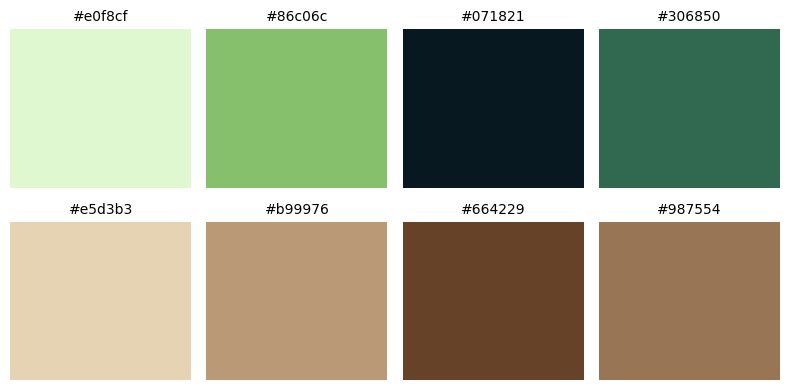

In [23]:
image_path = "/Users/sophial/Downloads/RPG_fantasy_tilesets/RPG_exterior.png"
# Define the color mapping as a dictionary
color_map = {
    "#e0f8cf":"#e5d3b3",      
    "#86c06c":"#b99976",      
    "#071821":"#664229", 
    "#306850":"#987554"
}

fig, ax = plt.subplots(2, len(color_map), figsize=(len(color_map) * 2, 4))
for i, (orig, mapped) in enumerate(color_map.items()):
    for j, color in enumerate([orig, mapped]):
        ax[j, i].add_patch(plt.Rectangle((0, 0), 1, 1, color=color))
        ax[j, i].set_title(color, fontsize=10)
        ax[j, i].axis("off")
plt.tight_layout()
plt.show()

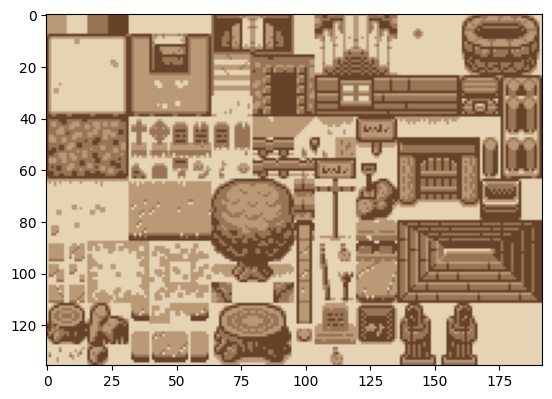

In [28]:
# Apply the color mapping
image = apply_color_mapping(image_path, color_map)
image.save("modified_image.png")
